# Do wildfires burn up jobs in rural California? An analysis of the Atlas of Rural and Small Town America dataset

## Overview
### Motivation
Global climate change is driving increases in wildfire occurence and intensity, while increasing anthropogenic land use brings humans in more contact with wilderness areas with greater fire risks. Major Californian wildfires have garnered global news attention and caused great financial dammage and human suffering. Understanding the effects of wildfire on humans and economies on local/regional scales will aid in better planning for a future where risk of wildfire is higher. Here, I invesitgate the relationship between wildfire area and socioeconomic in rural counties in California.

### Hypotheses (Incomplete)
Wildfires are devastating natural disasters that not only dirupt the lives and economies of the communities where they occur, but may also have significant post-fire effects that prevent a return to normalacy (which itself has cascading effects). Rural californian counties that experience higher wildfire occurrence may experience decreases in population and  employment rates following the event. I test the following hypotheses:
1) 
2) 
3)

### Data Sources
Socioeconomic data at the county level is available from the [Atlas of Rural and Small Town America](https://catalog.data.gov/dataset/atlas-of-rural-and-small-town-america) (Economic Research Service, United States Department of Agriculture, 2021). Wildfire data was drawn from the Kaggle dataset [California WildFires (2013-2020)](https://www.kaggle.com/ananthu017/california-wildfire-incidents-20132020?select=California_Fire_Incidents.csv) (Kaggle User Ares, 2020).

### Methods (Incomplete)
First, I prepared the socioeconomic statistics and population estimate tables and 


## Data Preparation

### Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import csv
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Import datasets

In [2]:
people = pd.read_csv('people.csv') # Import Rural Atlas population estimates 
jobs = pd.read_csv('jobs.csv', header = 0) # Import Rural Atlas employment metrics.
fires = pd.read_csv('California_Fire_Incidents.csv') # Import California Wildfire dataset.

### Clean and format initial tables

#### Population estimates

In [3]:
population = people[['State', 'County', 'TotalPopEst2010', 'TotalPopEst2011', 
    'TotalPopEst2012', 'TotalPopEst2013', 'TotalPopEst2014', 'TotalPopEst2015', 
    'TotalPopEst2016', 'TotalPopEst2017', 'TotalPopEst2018', 'TotalPopEst2019']] # Slice population data from people table.
 
population = population[ population['State'] == 'CA'] # Select CA counties.
population = population.drop('State', 1) # Remove State column.

population = population.set_index('County') # Make County column new index.
 
population.rename(index={'TotalPopEst2010': '2010',  'TotalPopEst2011': 
    '2011', 'TotalPopEst2012': '2012', 'TotalPopEst2013': '2013', 'TotalPopEst2014': '2014', 'TotalPopEst2015': '2015', 'TotalPopEst2016': '2016', 'TotalPopEst2017': '2017', 'TotalPopEst2018': '2018', 'TotalPopEst2019': '2019'}, inplace=True) # Rename index.

population = population.transpose() # Transpose so rows are years.

population.rename(index={'TotalPopEst2010': '2010', 'TotalPopEst2011': '2011', 
    'TotalPopEst2012': '2012', 'TotalPopEst2013': '2013', 'TotalPopEst2014': 
    '2014', 'TotalPopEst2015': '2015', 'TotalPopEst2016': '2016', 
    'TotalPopEst2017': '2017', 'TotalPopEst2018': '2018', 'TotalPopEst2019': 
    '2019'}, inplace=True) # Rename columns to years.

# Quick visualization of population trends for CA and each county
# population.plot(subplots = True, layout = (10,6), figsize=(30, 12));

In [4]:
jobs = jobs[jobs['State'] == 'CA'] # Select only counties in California.

#### Civilian labor force counts

In [5]:
nlabor = jobs[['State', 'County', 'NumCivLaborforce2007', 
    'NumCivLaborForce2008', 'NumCivLaborForce2009', 'NumCivLaborForce2010', 'NumCivLaborForce2011', 'NumCivLaborForce2012', 'NumCivLaborforce2013', 'NumCivLaborforce2014', 'NumCivLaborforce2015', 'NumCivLaborforce2016', 'NumCivLaborforce2017', 'NumCivLaborforce2018', 'NumCivLaborforce2019', 'NumCivLaborforce2020']] # Slice employment data from jobs table.

nlabor = nlabor.drop('State', 1) # Remove State column.
nlabor = nlabor.set_index('County') # Make County column new index.
               
nlabor = nlabor.transpose() # Transpose so columns are names while rows are years.

# Rename indexes to years.
nlabor.rename(index={'NumCivLaborforce2007': '2007', 'NumCivLaborForce2008':
    '2008', 'NumCivLaborForce2009': '2009', 'NumCivLaborForce2010': '2010', 
    'NumCivLaborForce2011': '2011', 'NumCivLaborForce2012': '2012', 
    'NumCivLaborforce2013': '2013', 'NumCivLaborforce2014': '2014', 
    'NumCivLaborforce2015': '2015', 'NumCivLaborforce2016': '2016', 
    'NumCivLaborforce2017': '2017', 'NumCivLaborforce2018': '2018', 
    'NumCivLaborforce2019': '2019', 'NumCivLaborforce2020': '2020'}, inplace=True)

#nlabor # Display the table of civilian labor force counts.

#### Employment counts, Unmployment counts, and Unemployment rates

In [6]:
# Prepare table for number of employed per year
nemp = jobs[['State', 'County', 'NumEmployed2007', 'NumEmployed2008',
    'NumEmployed2009', 'NumEmployed2010', 'NumEmployed2011', 'NumEmployed2012', 'NumEmployed2013', 'NumEmployed2014', 'NumEmployed2015', 'NumEmployed2016', 'NumEmployed2017', 'NumEmployed2018', 'NumEmployed2019', 'NumEmployed2020']] 
nemp = nemp.drop('State', 1)
nemp = nemp.set_index('County')
nemp = nemp.transpose()
nemp.rename(index={'NumEmployed2007': '2007', 'NumEmployed2008': '2008',
    'NumEmployed2009': '2009', 'NumEmployed2010': '2010', 'NumEmployed2011': '2011', 'NumEmployed2012': '2012', 'NumEmployed2013': '2013', 'NumEmployed2014': '2014', 'NumEmployed2015': '2015', 'NumEmployed2016': '2016', 'NumEmployed2017': '2017', 'NumEmployed2018': '2018', 'NumEmployed2019': '2019', 'NumEmployed2020': '2020'}, inplace=True)

# Prepare table for unemployment rate per year
runemp = jobs[['State', 'County', 'UnempRate2007', 'UnempRate2008',
    'UnempRate2009', 'UnempRate2010', 'UnempRate2011', 'UnempRate2012', 'UnempRate2013', 'UnempRate2014', 'UnempRate2015', 'UnempRate2016', 'UnempRate2017', 'UnempRate2018', 'UnempRate2019', 'UnempRate2020']]
runemp = runemp.drop('State', 1)
runemp = runemp.set_index('County')
runemp = runemp.transpose()
runemp.rename(index={'UnempRate2007': '2007', 'UnempRate2008': '2008',     
    'UnempRate2009': '2009', 'UnempRate2010': '2010', 'UnempRate2011': '2011', 'UnempRate2012': '2012', 'UnempRate2013': '2013', 'UnempRate2014': '2014', 'UnempRate2015': '2015', 'UnempRate2016': '2016', 'UnempRate2017': '2017', 'UnempRate2018': '2018', 'UnempRate2019': '2019', 'UnempRate2020': '2020'}, inplace=True)

# Prepare table number of unemployed per year
nunemp = jobs[['State', 'County', 'NumUnemployed2007', 'NumUnemployed2008', 
    'NumUnemployed2009', 'NumUnemployed2010', 'NumUnemployed2011', 'NumUnemployed2012', 'NumUnemployed2013', 'NumUnemployed2014', 'NumUnemployed2015', 'NumUnemployed2016', 'NumUnemployed2017', 'NumUnemployed2018', 'NumUnemployed2019', 'NumUnemployed2020']]
nunemp = nunemp.drop('State', 1)
nunemp = nunemp.set_index('County')
nunemp = nunemp.transpose()
nunemp.rename(index={'NumUnemployed2007': '2007', 'NumUnemployed2008': '2008', 
    'NumUnemployed2009': '2009', 'NumUnemployed2010': '2010', 'NumUnemployed2011': '2011', 'NumUnemployed2012': '2012', 'NumUnemployed2013': '2013', 'NumUnemployed2014': '2014', 'NumUnemployed2015': '2015', 'NumUnemployed2016': '2016', 'NumUnemployed2017': '2017', 'NumUnemployed2018': '2018', 'NumUnemployed2019': '2019', 'NumUnemployed2020': '2020'}, inplace=True)

# Uncomment to view tables as desired.
#nemp
#runemp
#nunemp

#### Clean and prepare wildfire dataset

In [65]:
# Drop rows for States of Oregon, Nevada, and Mexico
fires = fires[fires['Counties'] != 'State of Oregon'] 
fires = fires[fires['Counties'] != 'State of Nevada']
fires = fires[fires['Counties'] != 'Mexico']
fires = fires[fires['ArchiveYear'] < 2019] # so 2018 fires match next years' data (2019)

# Calculate acres burned per county per year and format
acres_burned = fires.groupby(["Counties", "ArchiveYear"])["AcresBurned"].sum().to_frame(name = 'AcresBurned')

# Reset indexes so dataframe is singly indexed
acres_burned = acres_burned.reset_index()

# Uncomment to view table.
acres_burned

,Counties,ArchiveYear,AcresBurned
0,Alameda,2013,478.0
1,Alameda,2015,3340.0
2,Alameda,2016,211.0
3,Alameda,2017,537.0
4,Alameda,2018,1288.0
...,...,...,...
273,Yolo,2018,91124.0
274,Yuba,2013,73.0
275,Yuba,2015,188.0
276,Yuba,2016,400.0


### Associate year-after employment statistics with yearly wildfire data

Here, I associate employment statistics with wildfire data by creating a helper function to gather year-after-fire data and year/ year-after-fire difference data for each year and county combination (e.g., Yuba county, 2017) and attach these as a new column in the acres_burned dataset.

In [66]:
# Create a helper function to gather year-after-fire data and year/ year-after-fire differences.

def yearAfterStats(df1, df2, colname):
    """Get year-after-fire data and calculate year/ year-after-fire differences from df2 for each year-county combo in df1 and attach as new column named 'colname' to df1."""
    
    # Catch year after fire values in a list
    yafLst = []
    # Catch year-of/year-after fire difference
    yafDiffLst = []
    # Catch year-before/year-of fire difference
    yofDiffLst = []

    # Iterate over each row in df1
    for index, row in df1.iterrows():
        # Get the county
        county = str(row[0])
        
        # Get the year before fire
        ybf = str(row[1] - 1)
        # Get the year of fire
        yof = str(row[1])
        # Get the year after fire
        yaf = str(row[1] + 1)
        
        # Get labor stat from the year before fire/county combo from df2
        ybfVal = df2.loc[ybf, county]
        # Get labor stat from the year of fire/county combo from df2
        yofVal = df2.loc[yof, county]
        # Get labor stat from the year after fire/county combo from df2 
        yafVal = df2.loc[yaf, county]
        
        # Calculate difference year-of and year-after values
        yafDiff = yofVal - yafVal
        # Calculate difference year-before and year-of values
        yofDiff = ybfVal - yofVal

        # Append year-after values to the appropriate list.
        yafLst.append(yafVal)
        # Append year-after values to the appropriate list.
        yafDiffLst.append(yafDiff)
        # Append year-after values to the appropriate list.
        yofDiffLst.append(yofDiff)

    # Create full column name
    colname_yaf = colname + 'Yaf'
    # Attach to dataframe
    df1[colname_yaf] = yafLst

    # Create full column name
    colname_yafdiff = colname + 'ChangeYaf'
    # Attach to dataframe
    df1[colname_yafdiff] = yafDiffLst

    # Create full column name
    colname_yofdiff = colname + 'ChangeYof'
    # Attach to dataframe
    df1[colname_yofdiff] = yofDiffLst  
    
      

In [67]:
yearAfterStats(acres_burned, nlabor, 'nLabor')
yearAfterStats(acres_burned, nemp, 'nEmp')
yearAfterStats(acres_burned, nunemp, 'nUnemp')
yearAfterStats(acres_burned, runemp, 'rUnemp')
yearAfterStats(acres_burned, population, 'nPop')

In [68]:
acres_burned


,Counties,ArchiveYear,AcresBurned,nLaborYaf,nLaborChangeYaf,nLaborChangeYof,nEmpYaf,nEmpChangeYaf,nEmpChangeYof,nUnempYaf,nUnempChangeYaf,nUnempChangeYof,rUnempYaf,rUnempChangeYaf,rUnempChangeYof,nPopYaf,nPopChangeYaf,nPopChangeYof
0,Alameda,2013,478.0,806326.0,-6479.0,-3391.0,758819.0,-17597.0,-15091.0,47507.0,11118.0,11700.0,5.9,1.4,1.5,1607792,-28199,-25829
1,Alameda,2015,3340.0,831827.0,-12819.0,-12682.0,796037.0,-16140.0,-21078.0,35790.0,3321.0,8396.0,4.3,0.5,1.1,1650950,-16412,-26746
2,Alameda,2016,211.0,838697.0,-6870.0,-12819.0,807652.0,-11615.0,-16140.0,31045.0,4745.0,3321.0,3.7,0.6,0.5,1660196,-9246,-16412
3,Alameda,2017,537.0,841484.0,-2787.0,-6870.0,815690.0,-8038.0,-11615.0,25794.0,5251.0,4745.0,3.1,0.6,0.6,1666756,-6560,-9246
4,Alameda,2018,1288.0,841075.0,409.0,-2787.0,815889.0,-199.0,-8038.0,25186.0,608.0,5251.0,3.0,0.1,0.6,1671329,-4573,-6560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,Yolo,2018,91124.0,107931.0,-382.0,-917.0,103397.0,-494.0,-1751.0,4534.0,112.0,834.0,4.2,0.1,0.8,220500,-382,-1641
274,Yuba,2013,73.0,27853.0,313.0,632.0,24696.0,-282.0,-117.0,3157.0,595.0,749.0,11.3,2.0,2.3,73533,-443,-316
275,Yuba,2015,188.0,28153.0,-427.0,127.0,25722.0,-587.0,-439.0,2431.0,160.0,566.0,8.6,0.7,2.0,74952,-907,-512
276,Yuba,2016,400.0,28738.0,-585.0,-427.0,26588.0,-866.0,-587.0,2150.0,281.0,160.0,7.5,1.1,0.7,76578,-1626,-907


## Data Exploration

### Normality

Many statistical methods (e.g., parametric statistical tests and many machine learning methods) assume variables are normally distributed; if this assumption is violated, these methods may produce inaccurate and misleading results. Non-normal data may be transformed or analyzed with non-parametric tests.

To determine if the variables examined here follow a normal distribution, I begin with a visual examination of the data and follow by applying Shapiro-Wilkes tests of normality.

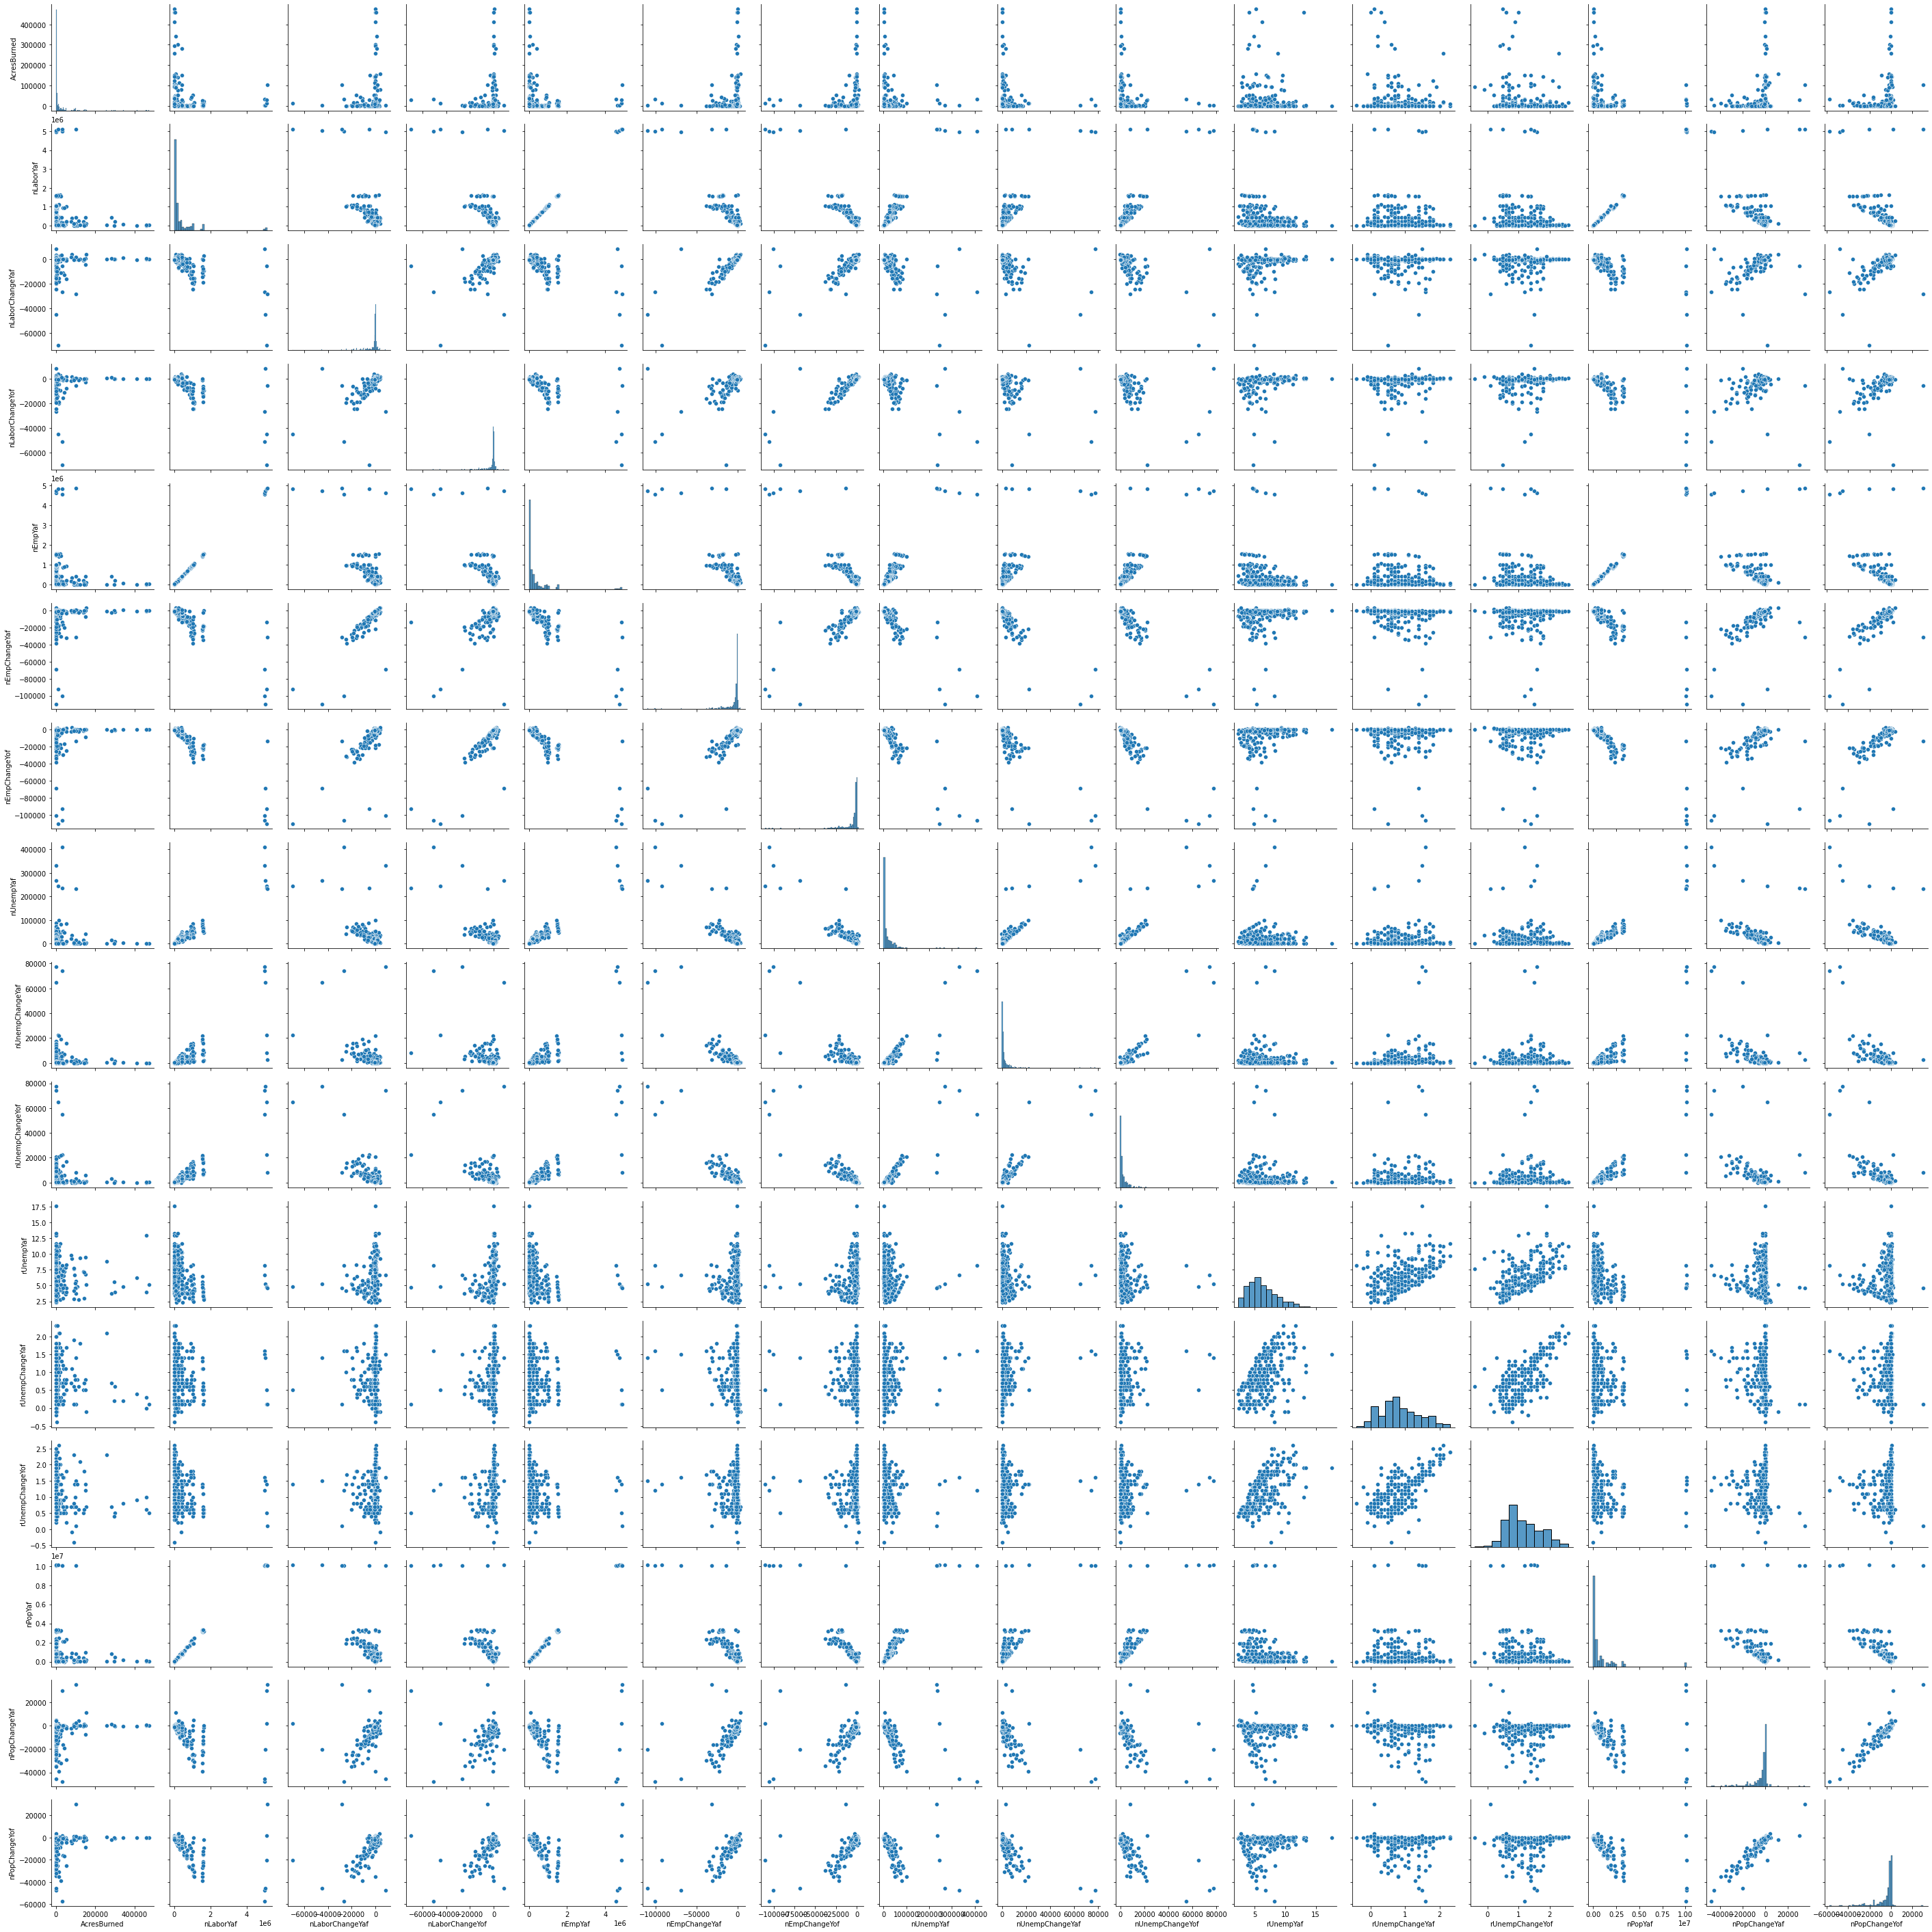

In [75]:
# Select only continuous data
burn_data = acres_burned.drop(['Counties', 'ArchiveYear'], axis=1)
# Plot variables against each other
sns.pairplot(burn_data) # Diagonal (top-left to bottom-right) are histograms of 


Visual inspection of the diagonal histograms (above) indicates none of the numeric data are normally distributed.

In [76]:
variable = []
pval = []
shapiro_W = []
for name, values in burn_data.iteritems():
    variable.append(name)
    res = stats.shapiro(values)
    shapiro_W.append(res[0])
    pval.append(res[1])

norm_res = {'variable': variable, 'p-value': pval, 'W-score': shapiro_W}
shapiro_normality = pd.DataFrame(data = norm_res)
shapiro_normality 

,variable,p-value,W-score
0,AcresBurned,2.565798e-29,0.401828
1,nLaborYaf,3.281607e-28,0.457505
2,nLaborChangeYaf,2.627430e-27,0.499843
3,nLaborChangeYof,5.338107e-28,0.467651
4,nEmpYaf,3.671113e-28,0.459857
5,nEmpChangeYaf,1.887362e-28,0.445785
6,nEmpChangeYof,1.873341e-28,0.445626
7,nUnempYaf,6.990636e-29,0.424239
8,nUnempChangeYaf,1.088488e-30,0.326593
9,nUnempChangeYof,1.457488e-29,0.388881


Additionally, Shapiro-Wilkes tests for normality (above) indicate none of the data are normally distributed. Here, significant p-values for each variable reject the null hypotheses that the distributions are not statistically different from a normal distribution. 

Apply a log transform to the data

In [12]:
burn_data1 = acres_burned[['AcresBurned', 'nlabor_yaf', 'nemp_yaf', 'runemp_yaf', 'nunemp_yaf', 'pop_yf', 'pop_yaf', 'deltapop_yaf']]

for name, values in burn_data.iteritems():
    namea = name + '_log'
    vals = []
    for i in values:
        if i > 0:
            vals.append(math.log(i))
        else:
            vals.append(np.NaN)
    burn_data1[namea] = vals
    
burn_data = burn_data1[['AcresBurned', 'nlabor_yaf', 'nemp_yaf', 'runemp_yaf', 'nunemp_yaf', 'pop_yf', 'pop_yaf', 'deltapop_yaf']]
    
burn_data_log = burn_data1[['AcresBurned_log', 'nlabor_yaf_log', 'nemp_yaf_log', 'runemp_yaf_log', 'nunemp_yaf_log', 'pop_yf_log', 'pop_yaf_log', 'deltapop_yaf_log']]
#burn_data_log

<ipython-input-12-06f079290b2d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  burn_data1[namea] = vals


Shapiro-Wilkes test for normality of log transformed data are normally distributed- except for runemp_yaf_log.

In [13]:
variable = []
pval = []
shapiro_W = []
for name, values in burn_data_log.iteritems():
    variable.append(name)
    vals = values[np.logical_not(np.isnan(values))]    
    res = stats.shapiro(vals)
    shapiro_W.append(res[0])
    pval.append(res[1])

norm_res = {'variable': variable, 'p-value': pval, 'W-score': shapiro_W}
shapiro_normality_log = pd.DataFrame(data = norm_res)
shapiro_normality_log

,variable,p-value,W-score
0,AcresBurned_log,0.003295,0.983791
1,nlabor_yaf_log,0.016044,0.987445
2,nemp_yaf_log,0.018812,0.987786
3,runemp_yaf_log,0.575351,0.995371
4,nunemp_yaf_log,0.023119,0.988226
5,pop_yf_log,0.019946,0.987911
6,pop_yaf_log,0.020526,0.987972
7,deltapop_yaf_log,0.003413,0.979425


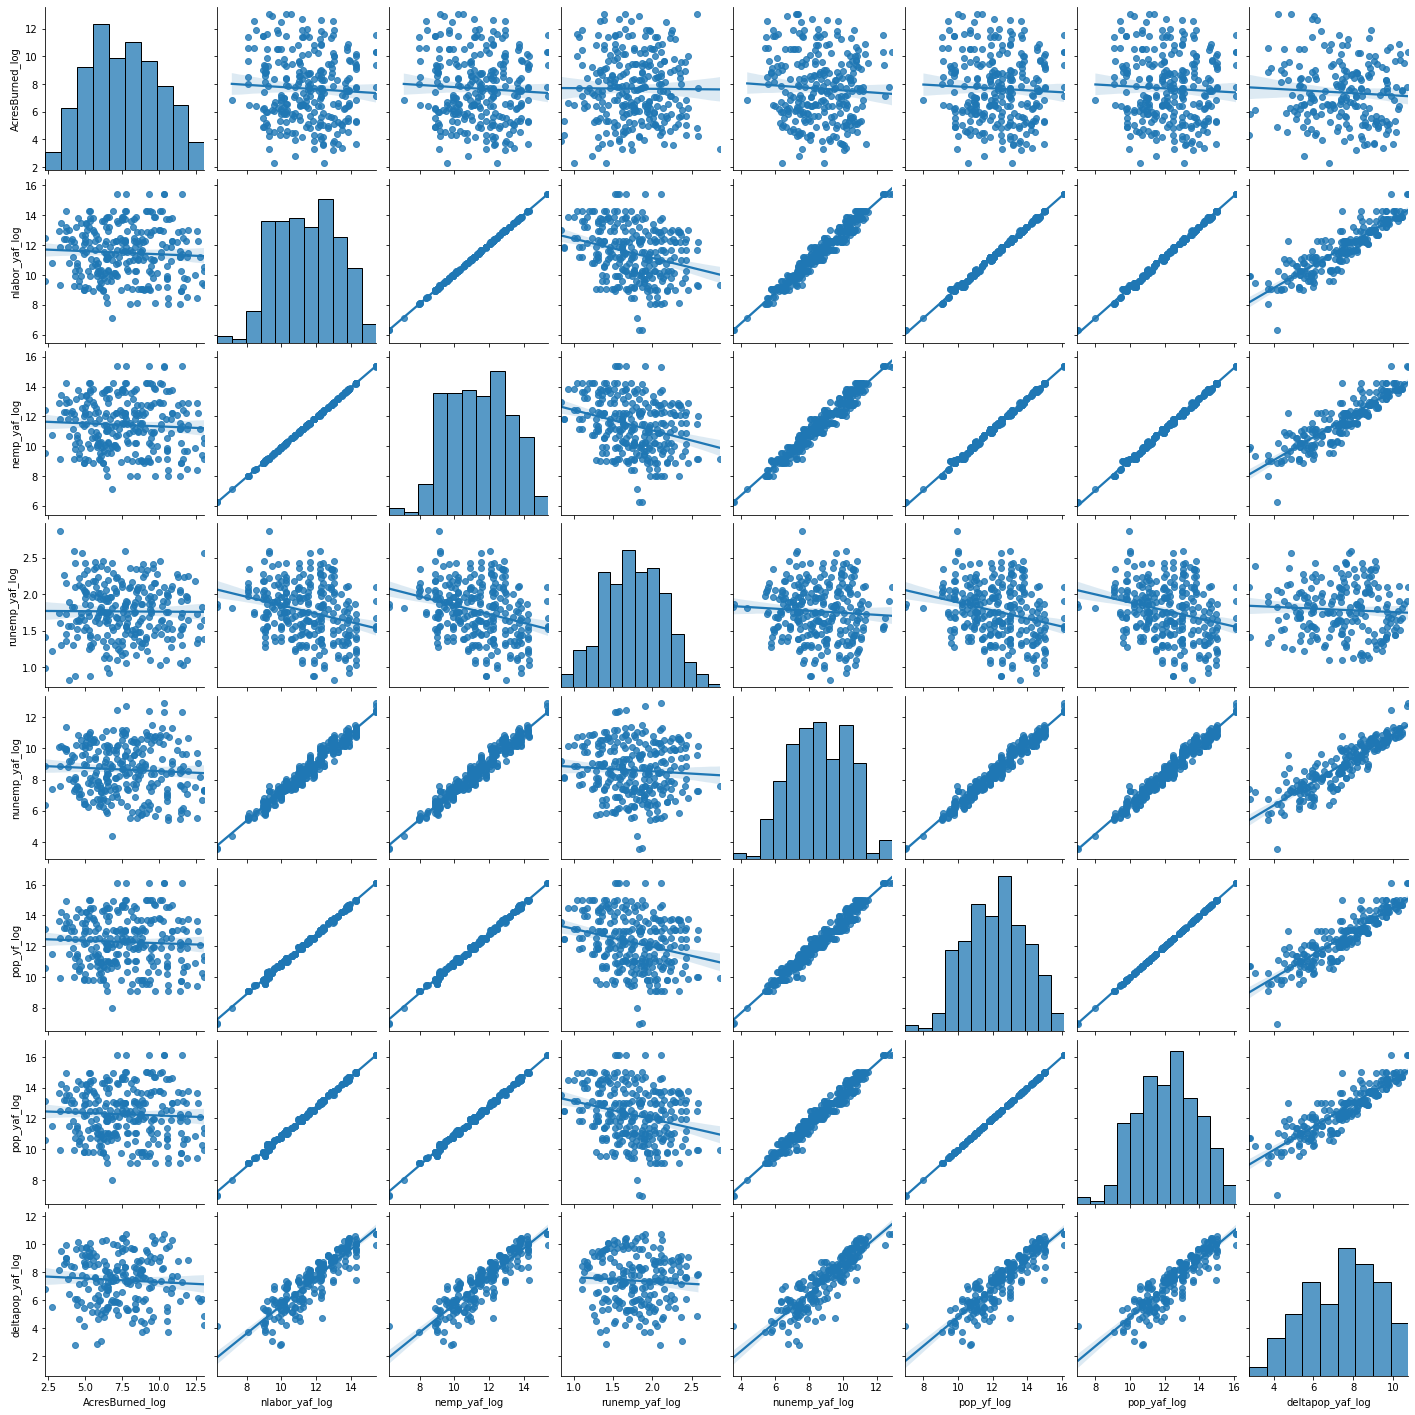

In [14]:
sns.pairplot(burn_data_log, kind = 'reg')

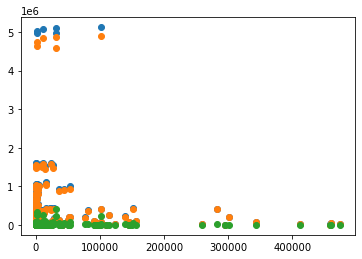

In [15]:
plt.scatter(acres_burned['AcresBurned'], acres_burned['nlabor_yaf'], label='Civilian Labor Force (n)')
plt.scatter(acres_burned['AcresBurned'], acres_burned['nemp_yaf'], label='Employed (n)')
plt.scatter(acres_burned['AcresBurned'], acres_burned['nunemp_yaf'], label='Unemployed (n)')

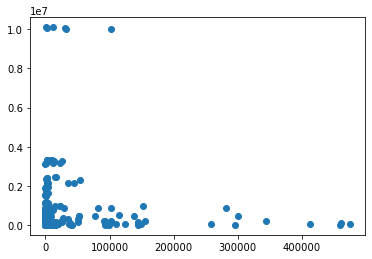

In [16]:
plt.scatter(acres_burned['AcresBurned'], acres_burned['pop_yaf'], label='Population')

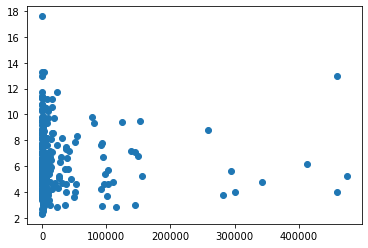

In [17]:
plt.scatter(acres_burned['AcresBurned'], acres_burned['runemp_yaf'], label='Unemployment Rate')

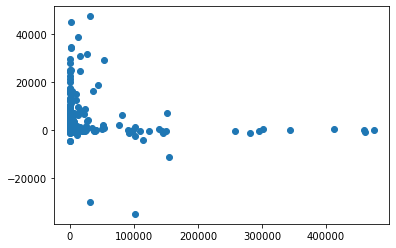

In [18]:
plt.scatter(acres_burned['AcresBurned'], acres_burned['deltapop_yaf'], label='Change in Population')